In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('C:\\Users\\Hotelsng\\Downloads\\Train_UWu5bXk.csv')

In [3]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [5]:
df['Item_Outlet_Sales'].corr(df['Item_Visibility'])

-0.12862461222077035

In [6]:
df['Item_Outlet_Sales'].corr(df['Item_MRP'])

0.5675744466569197

In [7]:
df['Item_Outlet_Sales'].corr(df['Item_Weight'])

0.014122739280056494

In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

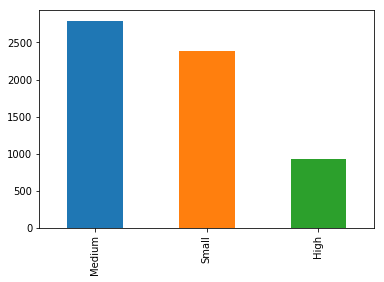

In [9]:
df['Outlet_Size'].value_counts().plot.bar()

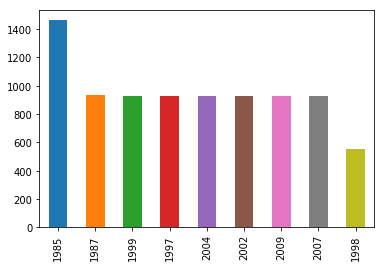

In [10]:
df['Outlet_Establishment_Year'].value_counts().plot.bar()

In [11]:
df['Item_Weight'].dtypes

dtype('float64')

In [12]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [13]:
df['Outlet_Size'].fillna(df['Outlet_Size'].value_counts().index[0], inplace=True)

In [36]:
item_mean= df['Item_Visibility'].mean()

In [42]:

df['Item_Visibility'] = df['Item_Visibility'].replace({0: df["Item_Visibility"].mean})

In [45]:
df["Item_Visibility"].fillna(df["Item_Visibility"].mean(), inplace=True)

In [46]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.070482   
4           NCD19         8.93          Low Fat         0.070482   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998      Medium               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [47]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [48]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.070482   
4           NCD19         8.93          Low Fat         0.070482   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998      Medium               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [49]:
df["Item_Visibility"].head()

0    0.016047
1    0.019278
2    0.016760
3    0.070482
4    0.070482
Name: Item_Visibility, dtype: float64

In [50]:
df.isnull().any().any()

False

In [51]:
df2= pd.get_dummies(df)

In [52]:
x= df2.drop('Item_Outlet_Sales', axis=1)

In [53]:
y= df2['Item_Outlet_Sales']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
bh= LinearRegression()

In [58]:
bh.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
h=bh.predict(x_test)

In [61]:
h[1:10]

array([ 4675.1875,   882.6875,   164.9375,  4276.3125,  1276.125 ,
        1859.5625, -1847.5   ,  2627.9375,  3873.0625])

In [63]:
from sklearn.linear_model import Ridge

In [68]:
ridge= Ridge(alpha=0.01, normalize=True)

In [69]:
ridge.fit(x_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [70]:
pred= ridge.predict(x_test)

In [71]:
print(pred)

[-431.72541754 4653.81943572  899.35671878 ...  118.9972695   915.92774905
 2365.5383202 ]


In [72]:
from sklearn.linear_model import Lasso

In [73]:
lasso= Lasso(alpha=0.01 , normalize= True)

In [74]:
lasso.fit(x_train, y_train)

C:\Users\Hotelsng\Downloads\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [76]:
lasso.predict(x_test)

array([-433.72521452, 4640.26315826,  845.35904911, ...,  135.28895783,
        889.42911299, 2327.53506498])

In [78]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
decision= DecisionTreeRegressor()

In [80]:
decision.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [82]:
decision.predict(x_test[1:10])

array([3755.112 ,  713.0718,  373.5138, 2972.1312, 1713.7692, 2808.3444,
        135.8232, 3677.2134, 6327.7632])

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
clf= RandomForestRegressor(n_estimators=10)

In [31]:
clf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [32]:
clf.predict(x_test[1:10])

array([3451.24088,  886.8456 , 3428.33736,  337.96008, 2418.1856 ,
       2646.8879 , 1748.65712, 1474.61384, 2692.76152])

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

In [84]:
grade= GradientBoostingRegressor()

In [85]:
grade.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [87]:
grade.predict(x_test[1:10])

array([3206.75104616,  741.20012546,  762.40740245, 3183.04952269,
       2522.46631664, 2522.46631664,   47.63580869, 2525.02853917,
       3832.56440435])

In [89]:
import xgboost

ModuleNotFoundError: No module named 'xgboost'